In [9]:
import pandas as pd 
import datetime as dt
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from collections import defaultdict

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('./data/diary_entries.csv')
df.head(5)

,Author,Date,Text
0,Корней Чуковский,1916-11-14,К первому декабря у нас будет матерьялу на 3–4...
1,Император Николай II,1916-11-14,Погода была плохая и дождливая. Завтракало мно...
2,Борис Штюрмер,1916-11-14,ВАШЕМУ ИМПЕРАТОРСКОМУ ВЕЛИЧЕСТВУ приемлю долго...
3,Максим Горький,1916-11-14,Живем «на авось». Главным образом надеемся на ...
4,Русские ведомости,1916-11-14,В сегодняшнем журнале распоряжений по дирекции...


In [4]:
df.shape

(13901, 3)

In [5]:
# Delete duplicates 
df = df.drop_duplicates(subset=['Author', 'Text'], keep='first')

# Sub 13 days from the dates (difference between calendars)
df.loc[:, 'Date'] = pd.to_datetime(df.loc[:, 'Date'])
df.loc[:, 'Date'] -= dt.timedelta(days=13)
df.loc[:, 'Date'] = df.loc[:, 'Date'].dt.date

# Sort by date
df = df.sort_values(by='Date')

# Split texts
df.loc[:, 'Text'] = df.loc[:, 'Text'].apply(lambda x: x.split())

In [6]:
df.shape

(13521, 3)

In [7]:
df.to_csv('diary_entries_cleaned.csv')

# Количество сообщений

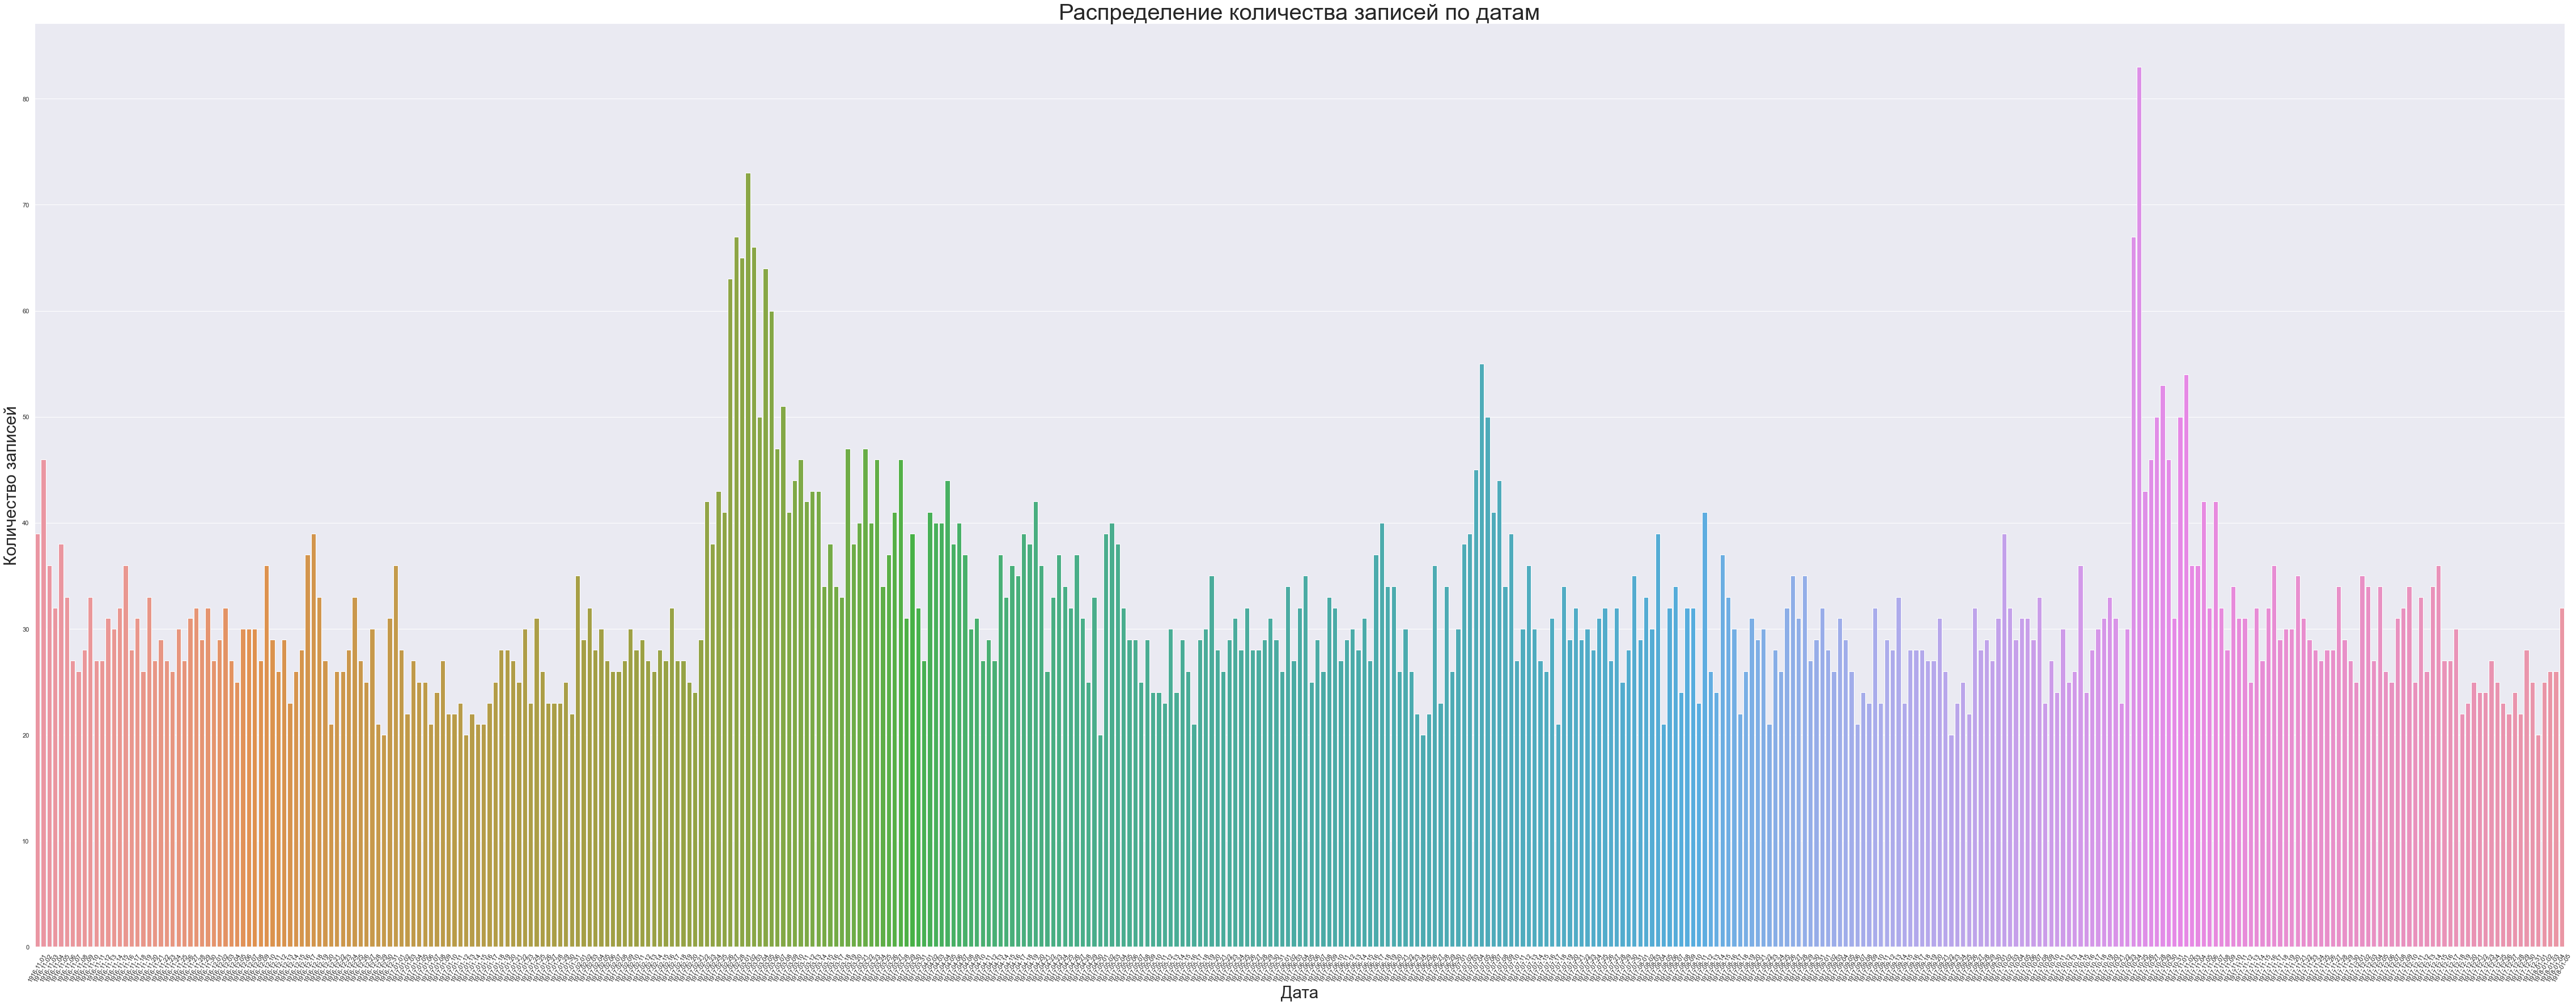

In [85]:
plt.figure(figsize=(80, 30))
sns.countplot(data=df, x=df['Date'])
plt.xlabel('Дата', fontsize=30)
plt.ylabel('Количество записей', fontsize=30)
plt.title('Распределение количества записей по датам', fontsize=40)
plt.xticks(rotation=60)
plt.show()

Можно заметить три пика, вполне объясняемых происходившими событиями: 

1) `Конец февраля - начало марта 1917` - Февральская революция               
2) `Начало июля 1917` - июльский кризис Временного правительства         
3) `Конец октября 1917` - Октябрьский переворот

# Длина сообщений

Посчитаем длину каждой записи: 

In [71]:
df['Text_len'] = df['Text'].apply(lambda x: len(x))
df['Text_len'].describe()

count    13521.000000
mean        86.614156
std         81.808365
min          0.000000
25%         35.000000
50%         65.000000
75%        111.000000
max       1846.000000
Name: Text_len, dtype: float64

Можно заметить, что в распределении длин сообщений однозначно есть выбросы, поэтому при построении графика распределения возьмем 95% перцентиль. 

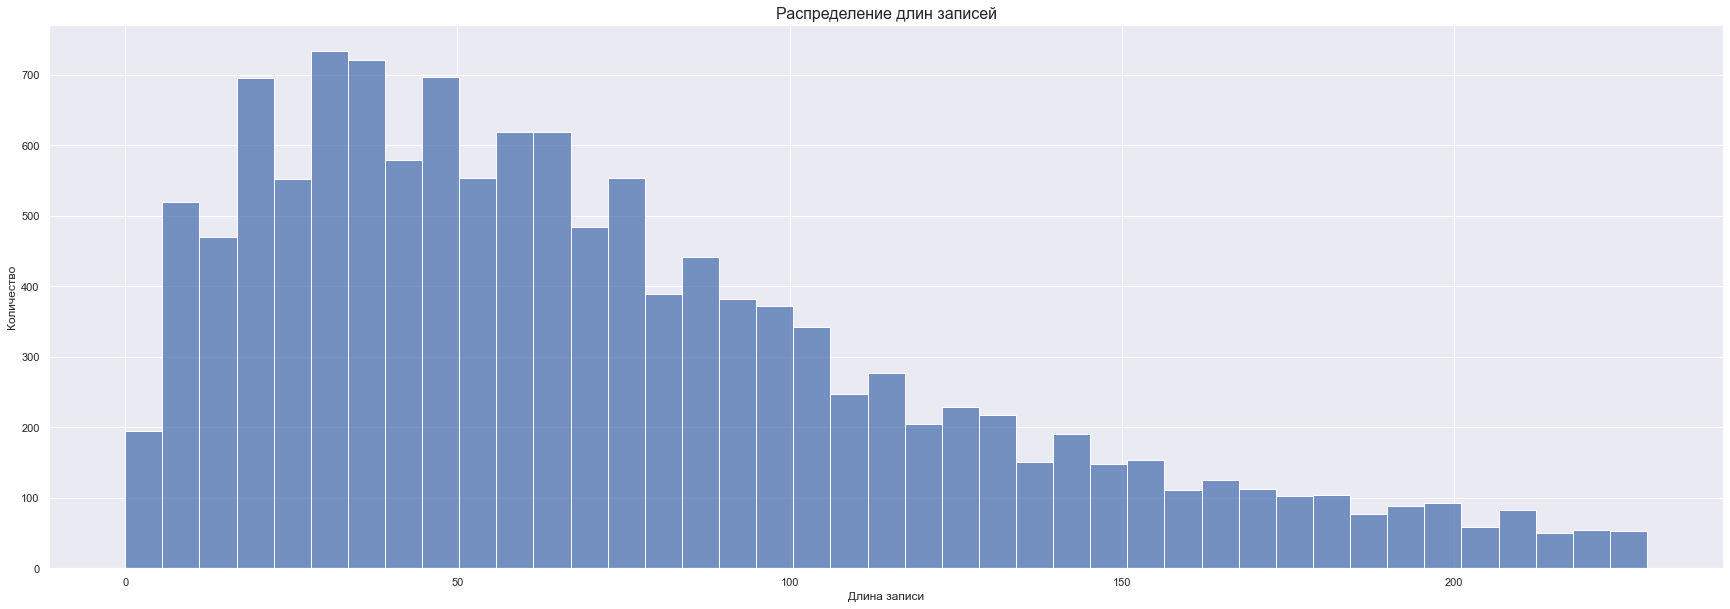

In [78]:
quantile = df['Text_len'].quantile(0.95)

plt.figure(figsize=(30, 10))
sns.histplot(data=df[df['Text_len'] < quantile], x='Text_len')
plt.xlabel('Длина записи', fontsize=12)
plt.ylabel('Количество', fontsize=12)
plt.title('Распределение длин записей', fontsize=16)
plt.show()

# Топ авторов

In [8]:
print('Всего в датасете {} уникальных автора'.format(df['Author'].nunique()))

Всего в датасете 683 уникальных автора


Найдем количество дневниковых записей, написанных каждым из авторов. Затем оставим только тех авторов, количество записей которых превышает 40.  

In [187]:
df_tmp = df.groupby('Author').count()
df_tmp.reset_index(inplace=True)
df_tmp = df_tmp[['Author', 'Text']]
df_tmp = df_tmp[df_tmp['Text'] > 40]
df_tmp

,Author,Text
14,Pathe News,122
29,The New York Times,156
45,Александр Бенуа,181
46,Александр Блок,111
51,Александр Жиркевич,57
...,...,...
647,Федор Степун,45
651,Феликс Ростковский,42
652,Феликс Юсупов,44
672,Юлий Мартов,65


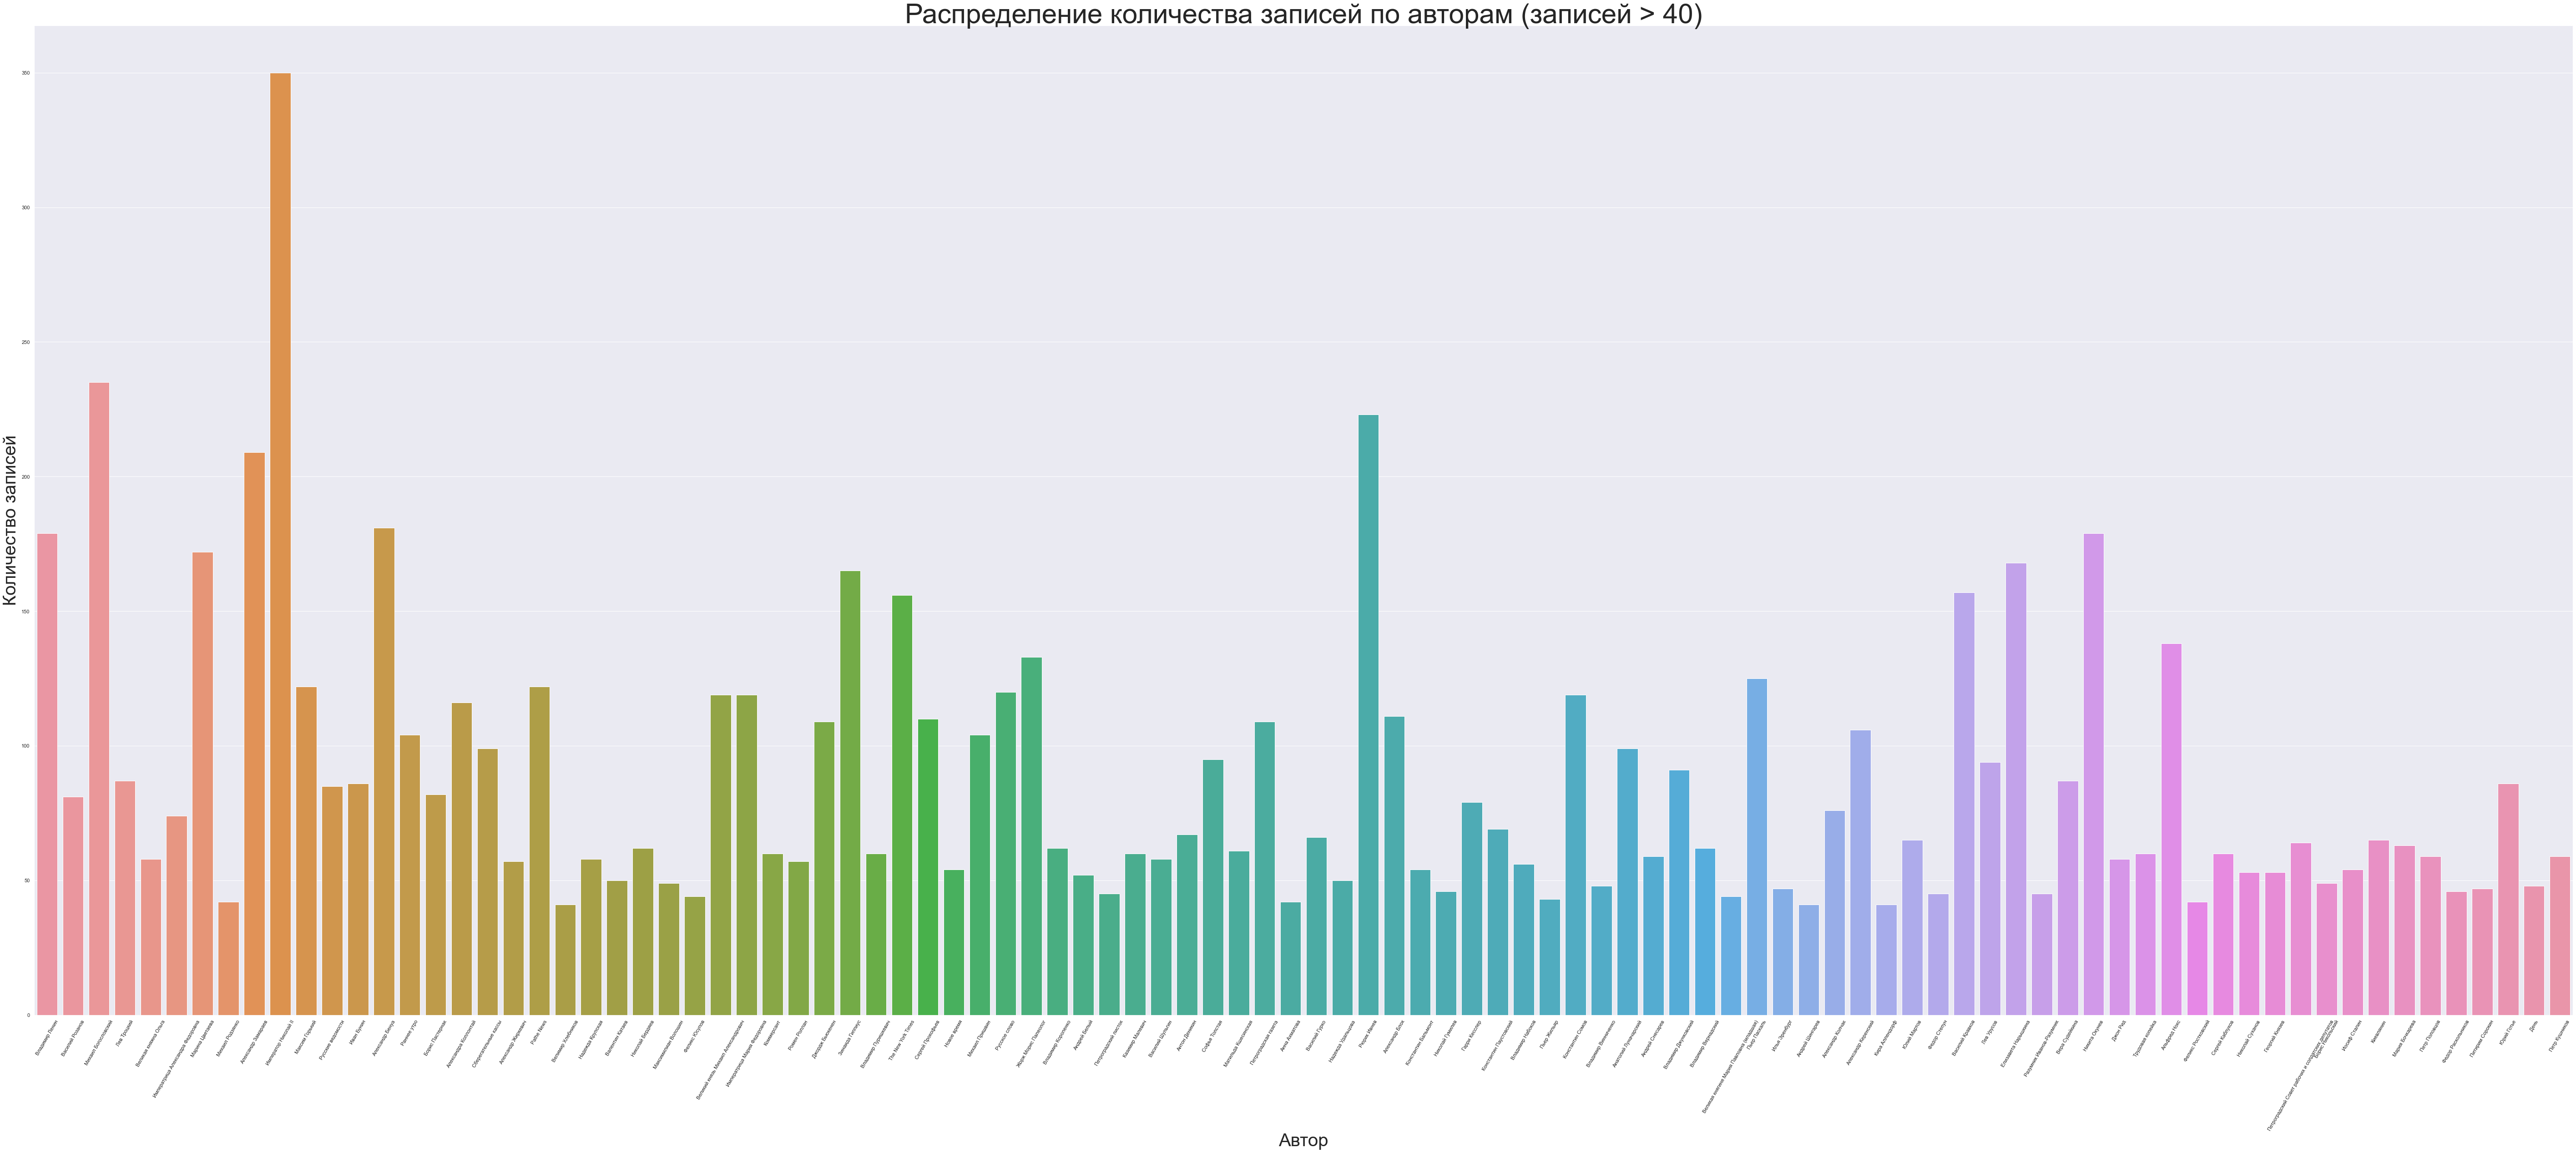

In [188]:
plt.figure(figsize=(100, 40))
sns.countplot(data=df[df['Author'].isin(df_tmp['Author'].values)], x='Author', orient='h')
plt.xlabel('Автор', fontsize=40)
plt.ylabel('Количество записей', fontsize=40)
plt.title('Распределение количества записей по авторам (записей > 40)', fontsize=60)
plt.xticks(rotation=60)
plt.show()

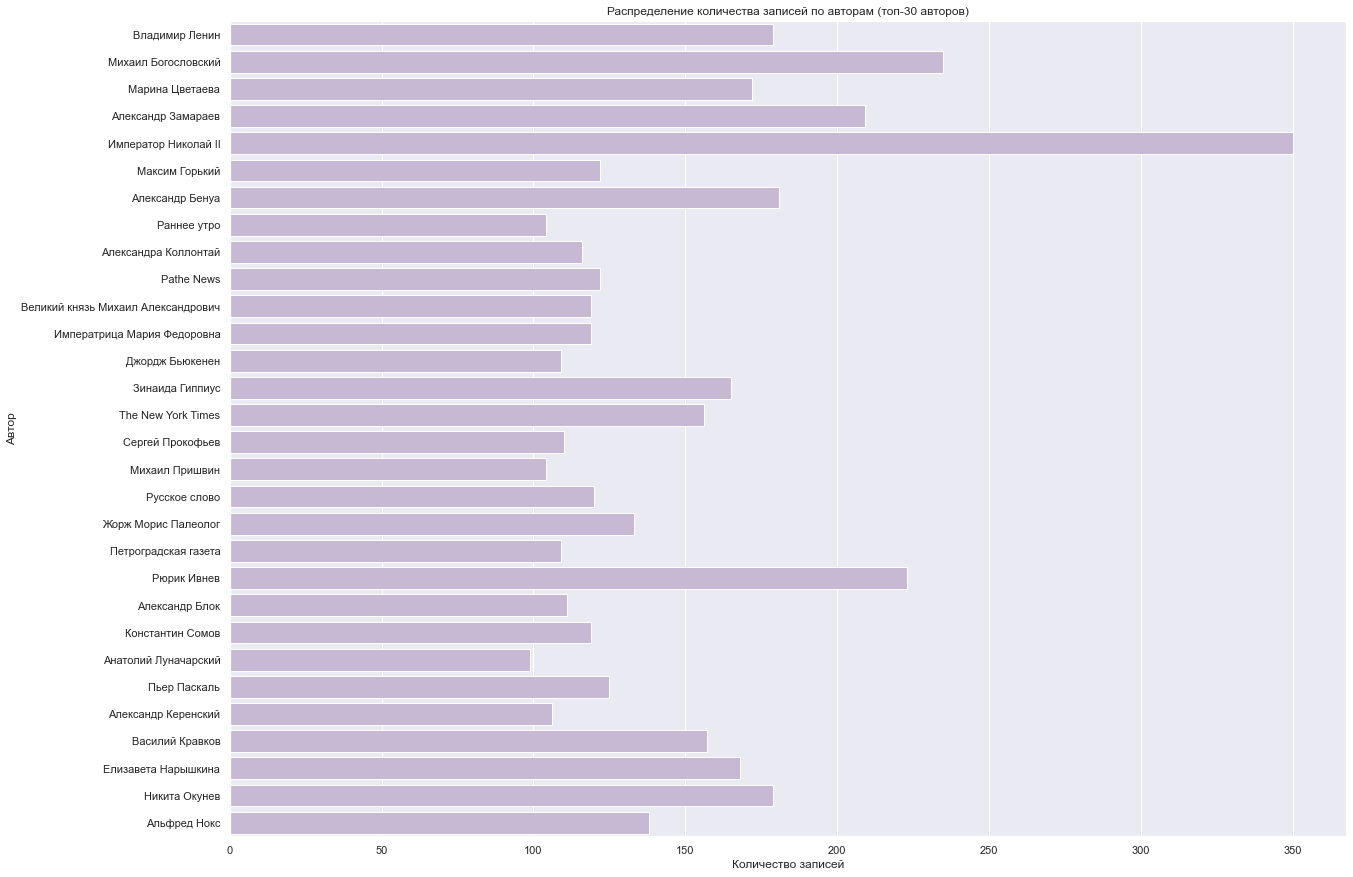

In [183]:
top_authors = df_tmp.sort_values(by='Text', ascending=False)['Author'][:30].values


plt.figure(figsize=(20, 15))
sns.countplot(data=df[df['Author'].isin(top_authors)], y='Author', color='#c7b5d8')
plt.ylabel('Автор')
plt.xlabel('Количество записей')
plt.title('Распределение количества записей по авторам (топ-30 авторов)')
plt.show()